In [1]:
!head Campo_ComaCluster_TP2024_Topicos.dat

# objID                 ra                   dec                  z             rp                   dV                   Mr                    gr                    C           dn4000      logSSFR       logSM       
  1237667783373815894   190.36509242025133   22.93077982861949    0.035670865   17.26313891690042    3771.2595981359486   -20.668733995090065   0.4301385027959519    2.1917648   1.337758    -9.822911     9.939624    
  1237667783914684423   200.29327450857346   22.691551278673664   0.031448953   16.695315905655725   2504.6858561038975   -21.08690946816583    0.7010758296076993    2.8515496   1.293469    -9.765995     10.571441   
  1237667910060867716   196.25274943634537   23.49141297002381    0.034404837   11.831493435744028   3391.450978517533    -20.35240821291448    0.7083040696870277    2.8152108   1.7430892   -11.745109    10.202046   
  1237668273507663949   199.06978528401143   20.5682888292296     0.022718353   14.026255439924718   114.49404090642899   -18.288184

# Initial approximation

In [31]:
# As we can see the dat file is simple enough to read, lets use numpy directly
import numpy as np

In [32]:
filename = 'Campo_ComaCluster_TP2024_Topicos.dat'
rawdata = np.loadtxt(filename)
# Simple enough then the header is as follows
header = np.array(["objID","ra","dec","z","rp","dV","Mr","gr","C","dn4000","logSSFR","logSM"])

In [33]:
rawdata.shape,header.shape

((3436, 12), (12,))

In [34]:
# lets move the data to an easily understandable dictionary for manipulation :D
# then delete the raw data array to save memory
data = {}
i = 0
for col in header:
    data[col] = rawdata[:,i]
    i += 1
print('dictionary created')
del rawdata
del header

dictionary created


In [46]:
data

{'objID': array([1.23766778e+18, 1.23766778e+18, 1.23766791e+18, ...,
        1.23766744e+18, 1.23766744e+18, 1.23766774e+18]),
 'ra': array([190.36509242, 200.29327451, 196.25274944, ..., 194.50649495,
        194.6576242 , 190.47107725]),
 'dec': array([22.93077983, 22.69155128, 23.49141297, ..., 27.48966584,
        27.46395368, 22.34880181]),
 'z': array([0.03567087, 0.03144895, 0.03440484, ..., 0.02543061, 0.0209099 ,
        0.02320768]),
 'rp': array([17.26313892, 16.69531591, 11.83149344, ...,  1.19052802,
         0.90078389, 11.96794387]),
 'dV': array([3771.25959814, 2504.6858561 , 3391.45097852, ...,  699.18423861,
         657.03116387,   32.30493486]),
 'Mr': array([-20.668734  , -21.08690947, -20.35240821, ..., -20.86004954,
        -19.00411459, -19.0197875 ]),
 'gr': array([0.4301385 , 0.70107583, 0.70830407, ..., 0.70748191, 0.63790145,
        0.56356677]),
 'C': array([2.1917648, 2.8515496, 2.8152108, ..., 2.7672927, 2.4587986,
        2.324248 ]),
 'dn4000': array(

In [18]:
# Now with the data loaded, we will probably need some visualization tools ;D
import matplotlib.pyplot as plt

In [49]:
# Some general Coma Cluster data
ra_coma = 194.9531
dec_coma = 27.9807
z_coma = 0.0231

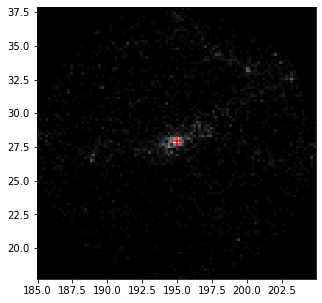

In [60]:
fig,ax = plt.subplots(1,1,figsize=(5,5))
ax.hist2d(data['ra'],data['dec'],weights=data['Mr'],bins=100,cmap='Greys')
ax.scatter(ra_coma,dec_coma,c='red',s=100,marker='+')
plt.show()

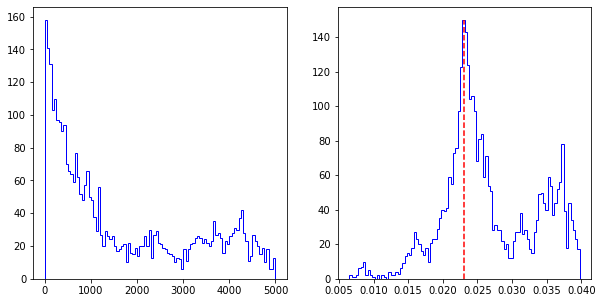

In [91]:
fig,axes = plt.subplots(1,2,figsize=(10,5))
axes[0].hist(data['dV'],bins=100,histtype='step',color='blue')
axes[1].hist(data['z'],bins=100,histtype='step',color='blue')
axes[1].plot(np.full(10,z_coma),np.linspace(0,150,10),'--r')
plt.show()

In [87]:
# Now we have a reasonable overview of the raw data, to differentiate the cluster members
# Lets define a function for loading the data to dictionary, and then operate on that

# (I) Loading the data

In [326]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import astropy.stats.sigma_clipping as sigma_clipping
import scipy

In [373]:
def txt_to_dic(filename):
    """
    Converts the file to a dictionary, makes things easier to read.
    """
    dic = {}
    rawdata = np.loadtxt(filename)
    header = np.array(["objID","ra","dec","z","rp","dV","Mr","gr","C","dn4000","logSSFR","logSM"])
    i = 0
    for col in header:
        dic[col] = rawdata[:,i]
        i += 1
    return dic

In [374]:
data = txt_to_dic('Campo_ComaCluster_TP2024_Topicos.dat')
data.keys()

dict_keys(['objID', 'ra', 'dec', 'z', 'rp', 'dV', 'Mr', 'gr', 'C', 'dn4000', 'logSSFR', 'logSM'])

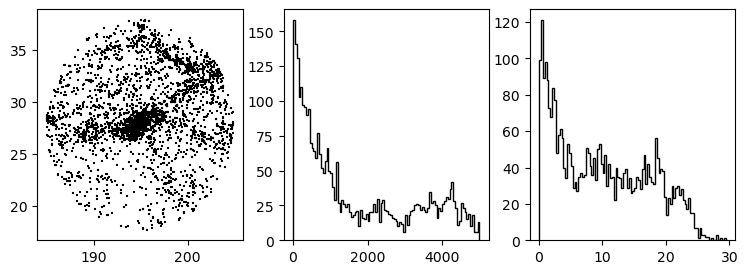

In [375]:
fig,axes = plt.subplots(1,3,figsize=(9,3))
axes[0].scatter(data['ra'],data['dec'],s=1,marker='+',color='black',zorder=1)
axes[1].hist(data['dV'],bins=100,histtype='step',color='black')
axes[2].hist(data['rp'],bins=100,histtype='step',color='black')
plt.show()

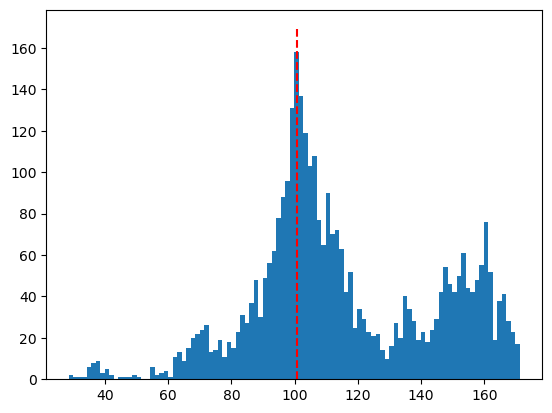

<Quantity 100.64286243 Mpc>

In [414]:
# Histograma distancia
from astropy.cosmology import Planck18

# Check data
cosmo = Planck18
# Some general Coma Cluster data
D = cosmo.lookback_distance(data['z'])
####
ra_coma = 194.9531
dec_coma = 27.9807
z_coma = 0.0231
D_coma = cosmo.lookback_distance(z_coma)

plt.hist(D,bins=100)
plt.plot(np.full(10,D_coma),np.linspace(0,170,10),'--',color='red')
plt.show()
D_coma

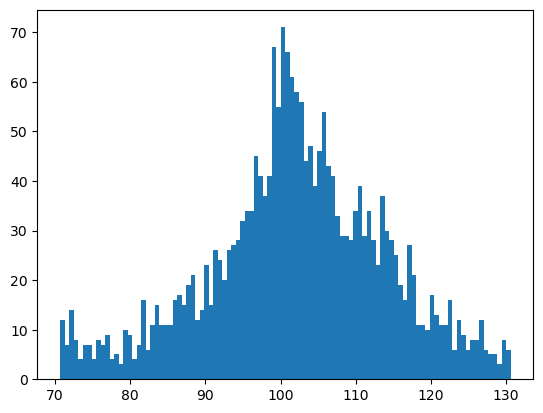

In [415]:
# Lets do a quick filter to estimate the center of the cluster in distance
D_filtr = D[(abs(D.value-D_coma.value)<30)] #Only distances within 30Mpc in radial distance from Coma cluster distance given
plt.hist(D_filtr,bins=100)
plt.show()

In [416]:
#begin sigma clipping of distance
sigma_clip = sigma_clipping.sigma_clip(D_filtr, sigma=3, cenfunc='median', maxiters=None, return_bounds=True, copy=False)
lowbound,upbound = sigma_clip[1],sigma_clip[2]
estimated_D_sigma = (upbound-lowbound)/6
estimated_D_coma = np.median(D_filtr) 
filtrD = ((D > lowbound) & (D < upbound)) #filtr according to center of the cluster
D_coma_error = abs(estimated_D_coma-D_coma)/D_coma
estimated_D_sigma,estimated_D_coma,D_coma_error,filtrD

(<Quantity 12.01096198 Mpc>,
 <Quantity 102.01916676 Mpc>,
 <Quantity 0.01367513>,
 array([False,  True, False, ...,  True,  True,  True]))

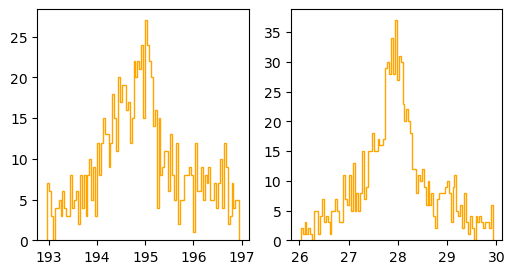

In [417]:
#Now lets do a quick filter of ra and dec
fig, axes = plt.subplots(1,2,figsize=(6,3))

ra = data['ra']
dec = data['dec']
coord_filtr = ((abs(ra-ra_coma)<2) & (abs(dec-dec_coma)<2))
ra_filtr = ra[coord_filtr]
dec_filtr = dec[coord_filtr]

axes[0].hist(ra_filtr,bins=100,histtype='step',color='orange')
axes[1].hist(dec_filtr,bins=100,histtype='step',color='orange')

plt.show()

In [418]:
#begin sigma clipping for ra
sigma_clip = sigma_clipping.sigma_clip(ra_filtr, sigma=3, cenfunc='median', maxiters=None, return_bounds=True, copy=False)
lowbound,upbound = sigma_clip[1],sigma_clip[2]
estimated_ra_sigma = (upbound-lowbound)/6
estimated_ra_coma = np.median(ra_filtr) 
filtrra = ((ra > lowbound) & (ra < upbound)) #filtr according to center of the cluster
ra_coma_error = abs(estimated_ra_coma-ra_coma)/ra_coma
estimated_ra_sigma,estimated_ra_coma,ra_coma_error,filtrra

(0.9134562774865174,
 194.8978254427538,
 0.0002835274599183456,
 array([False, False,  True, ...,  True,  True, False]))

In [419]:
#begin sigma clipping for dec
sigma_clip = sigma_clipping.sigma_clip(dec_filtr, sigma=3, cenfunc='median', maxiters=None, return_bounds=True, copy=False)
lowbound,upbound = sigma_clip[1],sigma_clip[2]
estimated_dec_sigma = (upbound-lowbound)/6
estimated_dec_coma = np.median(dec_filtr) 
filtrdec = ((dec > lowbound) & (dec < upbound)) #filtr according to center of the cluster
dec_coma_error = abs(estimated_dec_coma-dec_coma)/dec_coma
estimated_dec_sigma,estimated_dec_coma,dec_coma_error,filtrdec

(0.7532328907267344,
 27.94613384249497,
 0.001235357139207716,
 array([False, False, False, ...,  True,  True, False]))

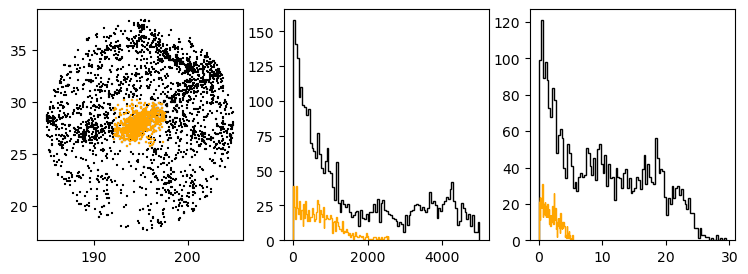

In [420]:
fig,axes = plt.subplots(1,3,figsize=(9,3))

filtr = filtrD & filtrra & filtrdec

axes[0].scatter(data['ra'],data['dec'],s=1,marker='+',color='black',zorder=1)
axes[0].scatter(data['ra'][filtr],data['dec'][filtr],s=2,marker='+',color='orange',zorder=100)
axes[1].hist(data['dV'],bins=100,histtype='step',color='black')
axes[1].hist(data['dV'][filtr],bins=100,histtype='step',color='orange')
axes[2].hist(data['rp'],bins=100,histtype='step',color='black')
axes[2].hist(data['rp'][filtr],bins=100,histtype='step',color='orange')
plt.show()

In [421]:
#Planck18
np.mean(data['dV'][filtr]),np.mean(data['rp'][filtr]),np.max(data['rp'][filtr])

(716.1634596279989, 1.8718406605635654, 5.304715286722682)

In [413]:
#Planck15
np.mean(data['dV'][filtr]),np.mean(data['rp'][filtr]),np.max(data['rp'][filtr])

(716.1634596279989, 1.8718406605635654, 5.304715286722682)

In [405]:
#Planck13
np.mean(data['dV'][filtr]),np.mean(data['rp'][filtr]),np.max(data['rp'][filtr])

(716.1634596279989, 1.8718406605635654, 5.304715286722682)

In [388]:
#WMAP9
np.mean(data['dV'][filtr]),np.mean(data['rp'][filtr]),np.max(data['rp'][filtr])

(717.7813495614929, 1.8703937786119424, 5.304715286722682)

In [303]:
cluster_member_data = {}
for key in data:
    cluster_member_data[key] = data[key][filtr]

In [304]:
# Lets save these important cluster members into a file, and hdf5 file that is
with h5py.File('cluster_member.hdf5','w') as file:
    for key in cluster_member_data.keys():
        file[key] = cluster_member_data[key]
    file['count'] = len(cluster_member_data[key])

In [305]:
# Lets save all data as well, maybe it will be useful
with h5py.File('Campo.hdf5','w') as file:
    for key in data.keys():
        file[key] = data[key]
    file['count'] = len(data[key])

# (II) Analysis, and questions

In [ ]:
#1.5<2.5mpc
#periferia

In [321]:
# redshifts descargados si pueden ser usados para distancia
# al menos en este caso

In [338]:
# Checking saved data
with h5py.File('Campo.hdf5','r') as file:
    print(file['count'][()])
    print(file.keys())
with h5py.File('cluster_member.hdf5','r') as file:
    print(file['count'][()])
    print(file.keys())

3436
<KeysViewHDF5 ['C', 'Mr', 'count', 'dV', 'dec', 'dn4000', 'gr', 'logSM', 'logSSFR', 'objID', 'ra', 'rp', 'z']>
1052
<KeysViewHDF5 ['C', 'Mr', 'count', 'dV', 'dec', 'dn4000', 'gr', 'logSM', 'logSSFR', 'objID', 'ra', 'rp', 'z']>


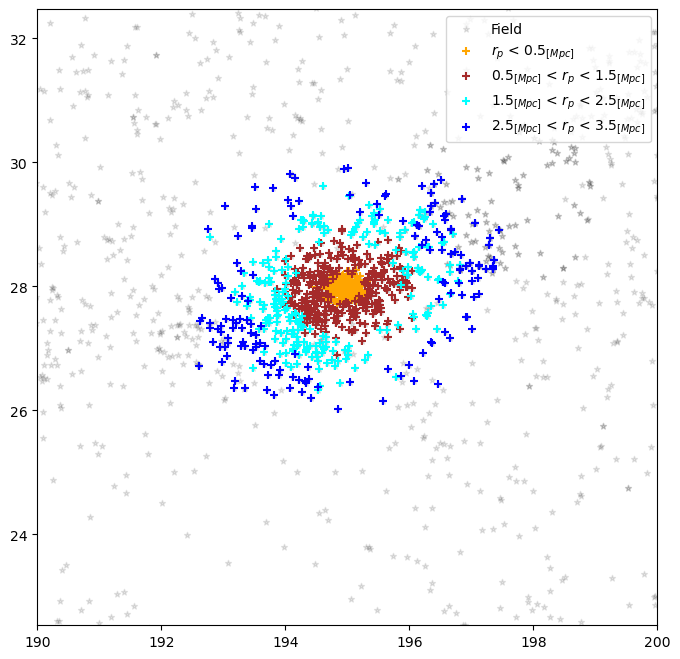

In [339]:
fig, ax = plt.subplots(1,1,figsize=(8,8))
with h5py.File('Campo.hdf5','r') as data:
    ax.scatter(data['ra'],data['dec'],s=20,marker='*',color='black',zorder=1,alpha=0.1,label='Field')

with h5py.File('cluster_member.hdf5','r') as data:
    region1 = (data['rp'][:] <= 0.5)
    region2 = ((data['rp'][:] > 0.5) & (data['rp'][:] <= 1.5))
    region3 = ((data['rp'][:] > 1.5) & (data['rp'][:] <= 2.5))
    region4 = ((data['rp'][:] > 2.5) & (data['rp'][:] <= 3.5))
    ax.scatter(data['ra'][region1],data['dec'][region1],s=30,marker='+',color='orange',zorder=100,label=r'$r_p$ < $0.5_{[Mpc]}$')
    ax.scatter(data['ra'][region2],data['dec'][region2],s=30,marker='+',color='brown',zorder=100,label=r'$0.5_{[Mpc]}$ < $r_p$ < $1.5_{[Mpc]}$')
    ax.scatter(data['ra'][region3],data['dec'][region3],s=30,marker='+',color='cyan',zorder=100,label=r'$1.5_{[Mpc]}$ < $r_p$ < $2.5_{[Mpc]}$')
    ax.scatter(data['ra'][region4],data['dec'][region4],s=30,marker='+',color='blue',zorder=100,label=r'$2.5_{[Mpc]}$ < $r_p$ < $3.5_{[Mpc]}$')

ax.legend(loc='upper right')
ax.axis('equal')
ax.set_xlim(190,200)
ax.set_ylim(25,30)
fig.savefig('figures/cluster.png',dpi=100)

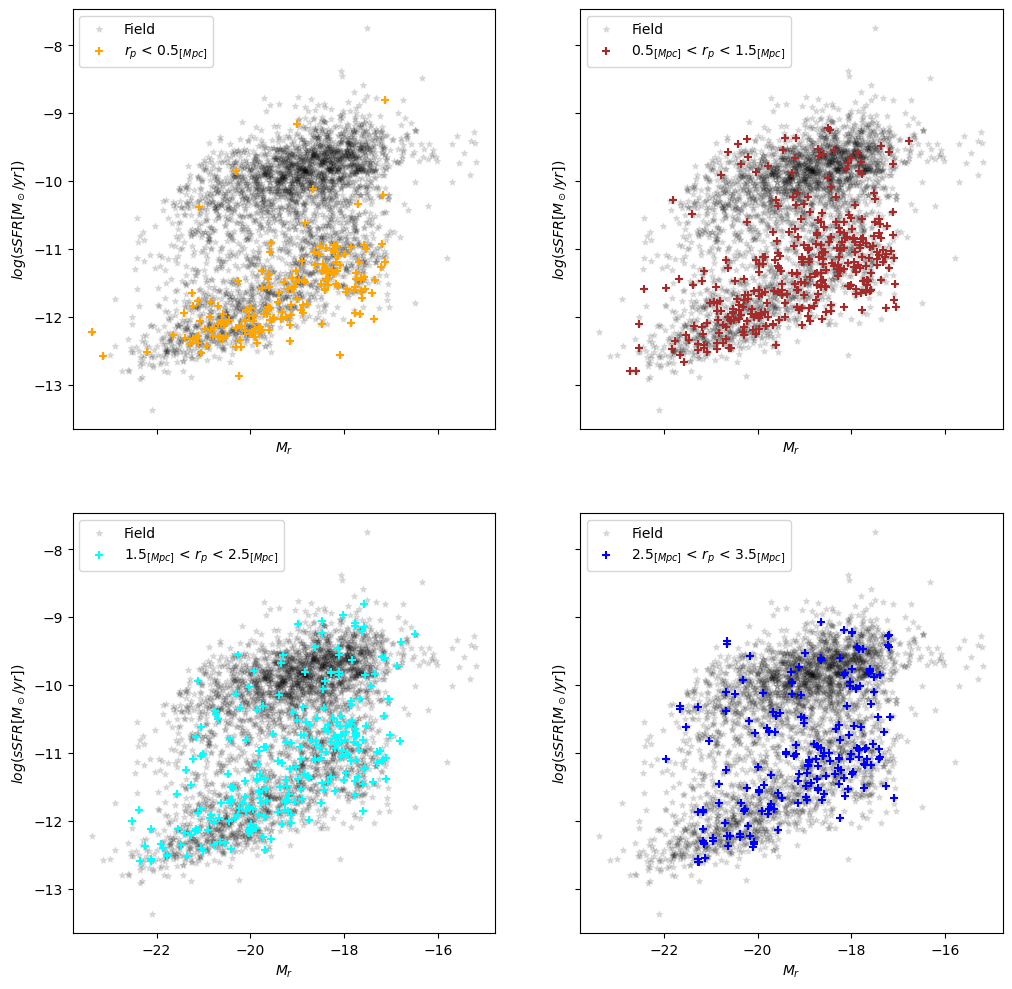

In [308]:
# Lets look at the log sSFR vs Mr
fig, axes = plt.subplots(2,2,figsize=(12,12),sharey=True,sharex=True)
with h5py.File('Campo.hdf5','r') as data:
    for col in axes:
        for ax in col:
            ax.scatter(data['Mr'],data['logSSFR'],s=20,marker='*',color='black',zorder=1,alpha=0.1,label='Field')

with h5py.File('cluster_member.hdf5','r') as data:
    region1 = (data['rp'][:] <= 0.5)
    region2 = ((data['rp'][:] > 0.5) & (data['rp'][:] <= 1.5))
    region3 = ((data['rp'][:] > 1.5) & (data['rp'][:] <= 2.5))
    region4 = ((data['rp'][:] > 2.5) & (data['rp'][:] <= 3.5))
    axes[0,0].scatter(data['Mr'][region1],data['logSSFR'][region1],s=30,marker='+',color='orange',zorder=100,label=r'$r_p$ < $0.5_{[Mpc]}$')
    axes[0,1].scatter(data['Mr'][region2],data['logSSFR'][region2],s=30,marker='+',color='brown',zorder=200,label=r'$0.5_{[Mpc]}$ < $r_p$ < $1.5_{[Mpc]}$')
    axes[1,0].scatter(data['Mr'][region3],data['logSSFR'][region3],s=30,marker='+',color='cyan',zorder=300,label=r'$1.5_{[Mpc]}$ < $r_p$ < $2.5_{[Mpc]}$')
    axes[1,1].scatter(data['Mr'][region4],data['logSSFR'][region4],s=30,marker='+',color='blue',zorder=300,label=r'$2.5_{[Mpc]}$ < $r_p$ < $3.5_{[Mpc]}$')

for col in axes:
    for ax in col:
        ax.legend()
        ax.set_xlabel(r'$M_r$')
        ax.set_ylabel(r'$log(sSFR {[M_\odot / yr]})$')
fig.savefig('figures/sfrmag_cluster.png',dpi=100)

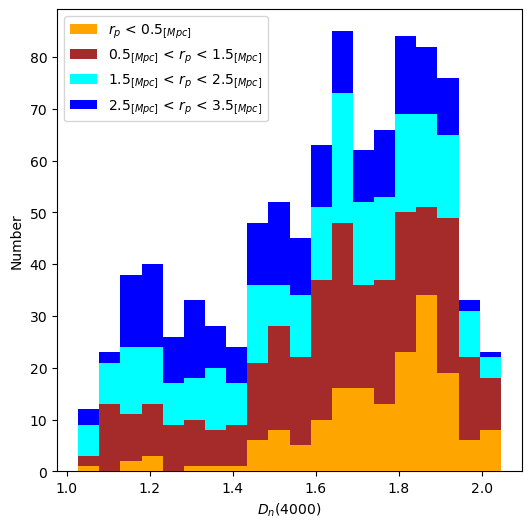

In [315]:
# Lets look at the distribution of Dn4000
fig, ax = plt.subplots(1,1,figsize=(6,6))
bins = 20

with h5py.File('Campo.hdf5','r') as data:
    region1 = (data['rp'][:] <= 0.5)
    region2 = ((data['rp'][:] > 0.5) & (data['rp'][:] <= 1.5))
    region3 = ((data['rp'][:] > 1.5) & (data['rp'][:] <= 2.5))
    region4 = ((data['rp'][:] > 2.5) & (data['rp'][:] <= 3.5))
    hist1,bins1,_ = ax.hist(data['dn4000'][region1],bins=bins,color='orange',zorder=100,label=r'$r_p$ < $0.5_{[Mpc]}$',histtype='stepfilled')
    hist2,bins2,_ = ax.hist(data['dn4000'][region2],bottom=hist1,bins=bins1,color='brown',zorder=200,label=r'$0.5_{[Mpc]}$ < $r_p$ < $1.5_{[Mpc]}$',histtype='stepfilled')
    hist3,bins3,_ = ax.hist(data['dn4000'][region3],bottom=hist1+hist2,bins=bins2,color='cyan',zorder=300,label=r'$1.5_{[Mpc]}$ < $r_p$ < $2.5_{[Mpc]}$',histtype='stepfilled')
    hist4,bins4,_ = ax.hist(data['dn4000'][region4],bottom=hist1+hist2+hist3,bins=bins3,color='blue',zorder=300,label=r'$2.5_{[Mpc]}$ < $r_p$ < $3.5_{[Mpc]}$',histtype='stepfilled')
    pass
ax.legend(loc='upper left')
ax.set_xlabel(r'$D_n$(4000)')
ax.set_ylabel(r'Number')
fig.savefig('figures/dn40SDSS Release00_cluster.png',dpi=100)

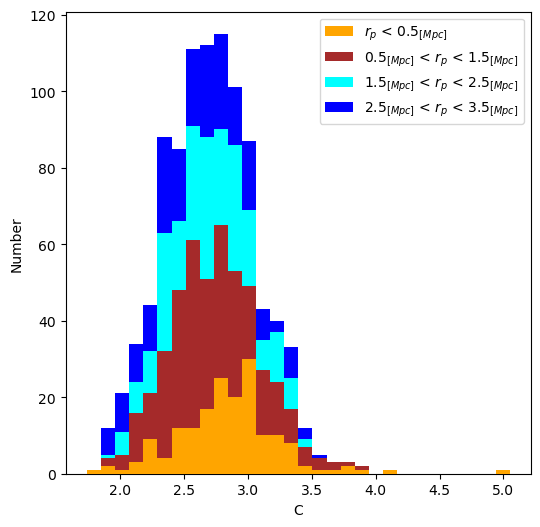

In [316]:
# Lets look at the distribution of Dn4000
fig, ax = plt.subplots(1,1,figsize=(6,6))
bins = 30

with h5py.File('Campo.hdf5','r') as data:
    region1 = (data['rp'][:] <= 0.5)
    region2 = ((data['rp'][:] > 0.5) & (data['rp'][:] <= 1.5))
    region3 = ((data['rp'][:] > 1.5) & (data['rp'][:] <= 2.5))
    region4 = ((data['rp'][:] > 2.5) & (data['rp'][:] <= 3.5))
    hist1,bins1,_ = ax.hist(data['C'][region1],bins=bins,color='orange',zorder=100,label=r'$r_p$ < $0.5_{[Mpc]}$',histtype='stepfilled')
    hist2,bins2,_ = ax.hist(data['C'][region2],bottom=hist1,bins=bins1,color='brown',zorder=200,label=r'$0.5_{[Mpc]}$ < $r_p$ < $1.5_{[Mpc]}$',histtype='stepfilled')
    hist3,bins3,_ = ax.hist(data['C'][region3],bottom=hist1+hist2,bins=bins2,color='cyan',zorder=300,label=r'$1.5_{[Mpc]}$ < $r_p$ < $2.5_{[Mpc]}$',histtype='stepfilled')
    hist4,bins4,_ = ax.hist(data['C'][region4],bottom=hist1+hist2+hist3,bins=bins3,color='blue',zorder=300,label=r'$2.5_{[Mpc]}$ < $r_p$ < $3.5_{[Mpc]}$',histtype='stepfilled')
    pass
ax.legend(loc='upper right')
ax.set_xlabel(r'C')
ax.set_ylabel(r'Number')
fig.savefig('figures/C_cluster.png',dpi=100)

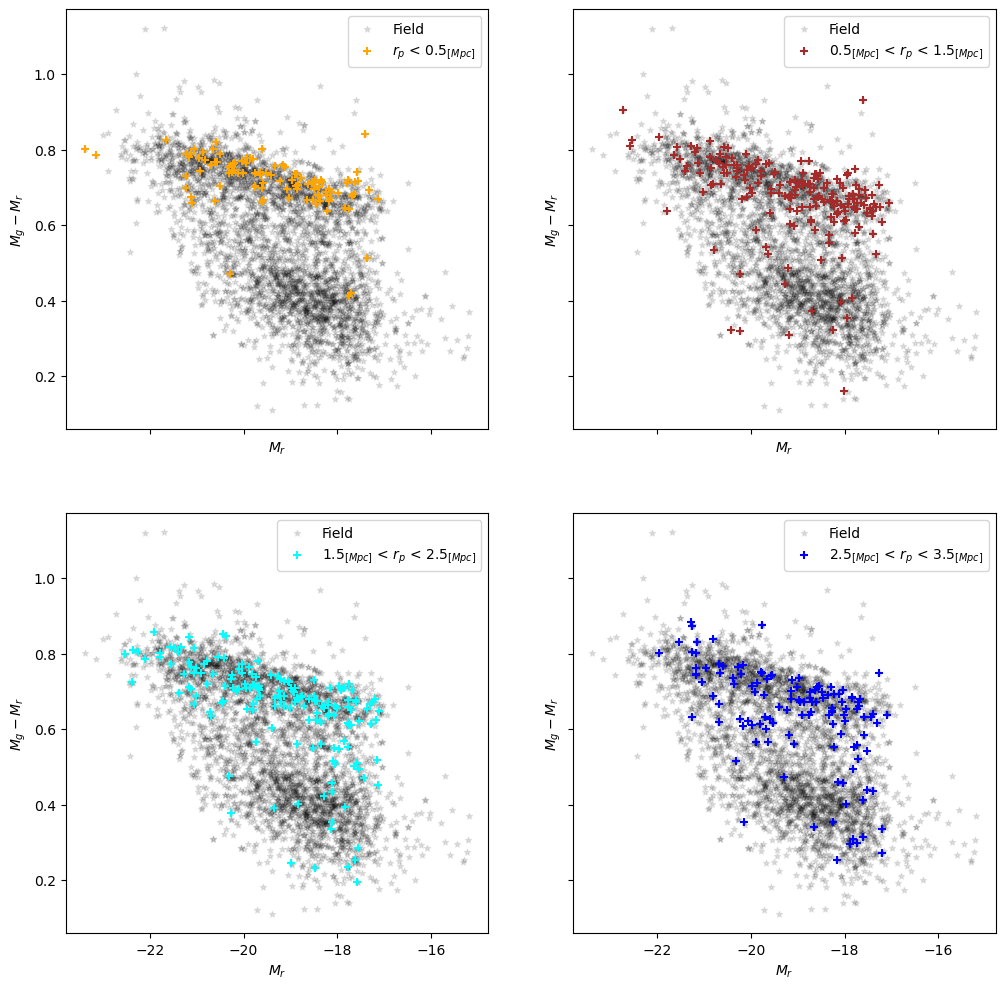

In [186]:
# Lets look at color-magnitude of the cluster members
fig, axes = plt.subplots(2,2,figsize=(12,12),sharex=True,sharey=True)
with h5py.File('Campo.hdf5','r') as data:
    for col in axes:
        for ax in col:
            ax.scatter(data['Mr'],data['gr'],s=20,marker='*',color='black',zorder=1,alpha=0.1,label='Field')

with h5py.File('cluster_member.hdf5','r') as data:
    region1 = (data['rp'][:] <= 0.5)
    region2 = ((data['rp'][:] > 0.5) & (data['rp'][:] <= 1.5))
    region3 = ((data['rp'][:] > 1.5) & (data['rp'][:] <= 2.5))
    region4 = ((data['rp'][:] > 2.5) & (data['rp'][:] <= 3.5))
    axes[0,0].scatter(data['Mr'][region1],data['gr'][region1],s=30,marker='+',color='orange',zorder=100,label=r'$r_p$ < $0.5_{[Mpc]}$')
    axes[0,1].scatter(data['Mr'][region2],data['gr'][region2],s=30,marker='+',color='brown',zorder=200,label=r'$0.5_{[Mpc]}$ < $r_p$ < $1.5_{[Mpc]}$')
    axes[1,0].scatter(data['Mr'][region3],data['gr'][region3],s=30,marker='+',color='cyan',zorder=300,label=r'$1.5_{[Mpc]}$ < $r_p$ < $2.5_{[Mpc]}$')
    axes[1,1].scatter(data['Mr'][region4],data['gr'][region4],s=30,marker='+',color='blue',zorder=300,label=r'$2.5_{[Mpc]}$ < $r_p$ < $3.5_{[Mpc]}$')
for col in axes:
    for ax in col:
        ax.legend()
        ax.set_xlabel(r'$M_r$')
        ax.set_ylabel(r'$M_g-M_r$')
fig.savefig('figures/cmd_cluster.png',dpi=100)

In [371]:
# 
with h5py.File('cluster_member.hdf5','r') as data:
    print('     name        ra     dec  ')
    for i in range(len(data['ra'][:])):
        ra = data['ra'][:]
        dec = data['dec'][:]
        rp = data['rp'][:]
        dV = data['dV'][:]
        samplesize = int(0.16 * len(ra))
        name_sample = np.empty(samplesize,dtype='U16')
        ra_sample = np.zeros(samplesize)
        dec_sample = np.zeros(samplesize)
        #####################
        for i in range(samplesize):
            if i < 0.25*samplesize:
                region1 = ((rp <= 0.5) & (dV <= 1250))
                name_add = 'region1_'+str(i)
                ra_add = ra[region1]
                dec_add = dec[region1]
                name_sample[i] = name_add
                ra_sample[i] = ra_add[i]
                dec_sample[i] = dec_add[i]
            elif i <= 0.5*samplesize:
                region2 = ((rp > 0.5) & (rp <= 1.5) & (dV <= 1250))
                name_add = 'region2_'+str(i)
                ra_add = ra[region2]
                dec_add = dec[region2]
                name_sample[i] = name_add
                ra_sample[i] = ra_add[i]
                dec_sample[i] = dec_add[i]
            elif i <= 0.75*samplesize:
                region3 = ((rp > 1.5) & (rp <= 2.5) & (dV <= 1250))
                name_add = 'region3_'+str(i)
                ra_add = ra[region3]
                dec_add = dec[region3]
                name_sample[i] = name_add
                ra_sample[i] = ra_add[i]
                dec_sample[i] = dec_add[i]
            elif i <= samplesize:
                region4 = ((rp > 2.5) & (rp <= 3.5) & (dV <= 1250))
                name_add = 'region4_'+str(i)
                ra_add = ra[region4]
                dec_add = dec[region4]
                name_sample[i] = name_add
                ra_sample[i] = ra_add[i]
                dec_sample[i] = dec_add[i]
        #######################
for i in range(len(ra_sample)):
    print('   ',name_sample[i][:],' ',np.round(ra_sample[i],3),' ',np.round(dec_sample[i],3))

     name        ra     dec  
    region1_0   194.779   27.772
    region1_1   194.723   28.126
    region1_2   194.781   27.768
    region1_3   194.701   28.019
    region1_4   194.949   28.098
    region1_5   194.74   27.785
    region1_6   195.071   28.064
    region1_7   194.834   27.886
    region1_8   195.117   27.956
    region1_9   194.839   27.974
    region1_10   194.881   28.047
    region1_11   194.98   28.128
    region1_12   195.033   28.079
    region1_13   195.046   28.065
    region1_14   194.789   28.041
    region1_15   195.018   28.155
    region1_16   194.906   28.166
    region1_17   195.057   27.867
    region1_18   194.712   28.084
    region1_19   195.126   28.16
    region1_20   194.864   27.785
    region1_21   194.99   28.065
    region1_22   195.022   28.024
    region1_23   195.038   28.17
    region1_24   195.056   28.053
    region1_25   194.908   27.777
    region1_26   194.92   28.145
    region1_27   194.848   27.92
    region1_28   194.79   27.867
  